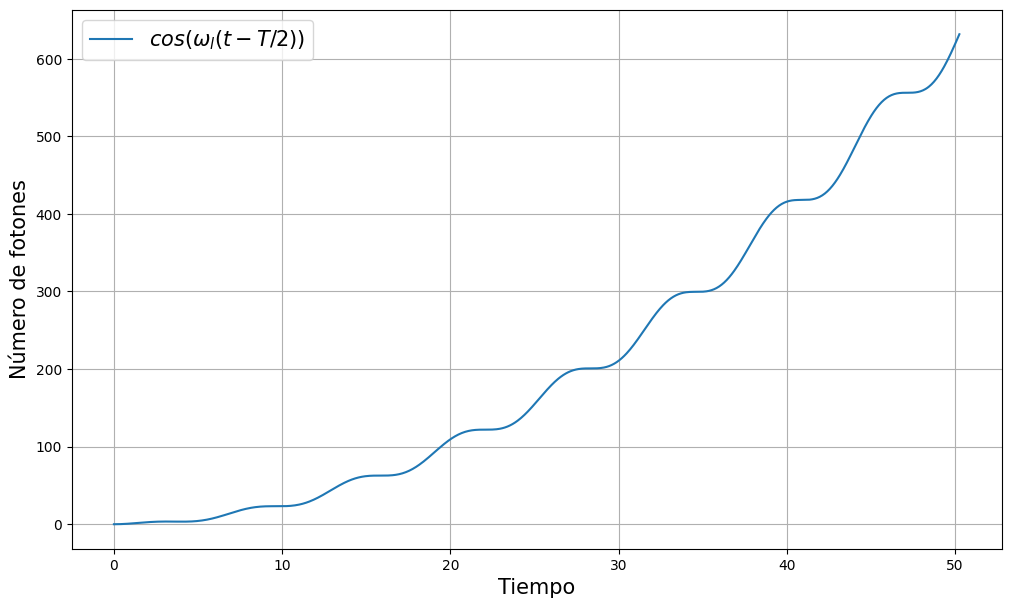

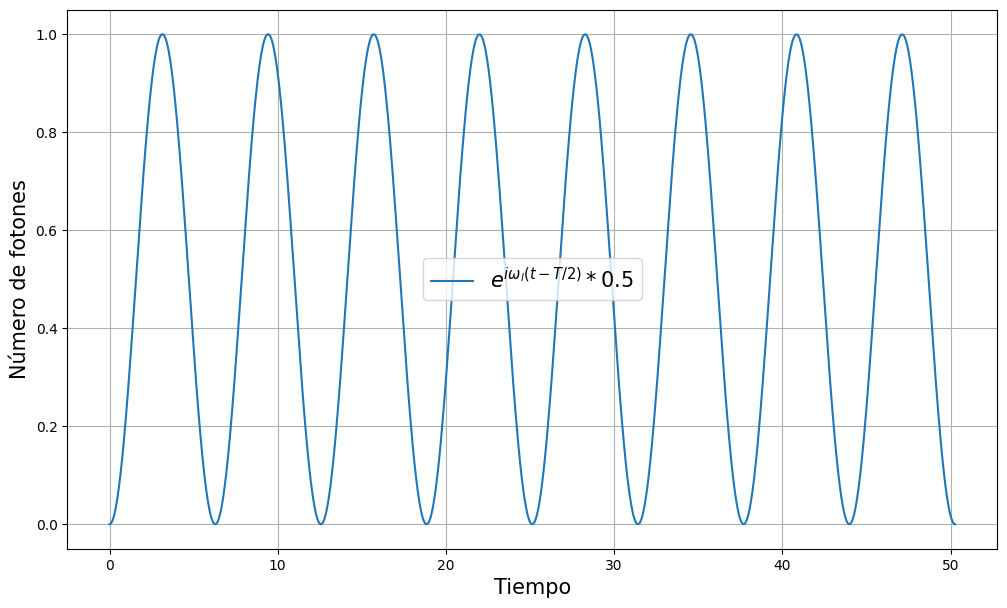

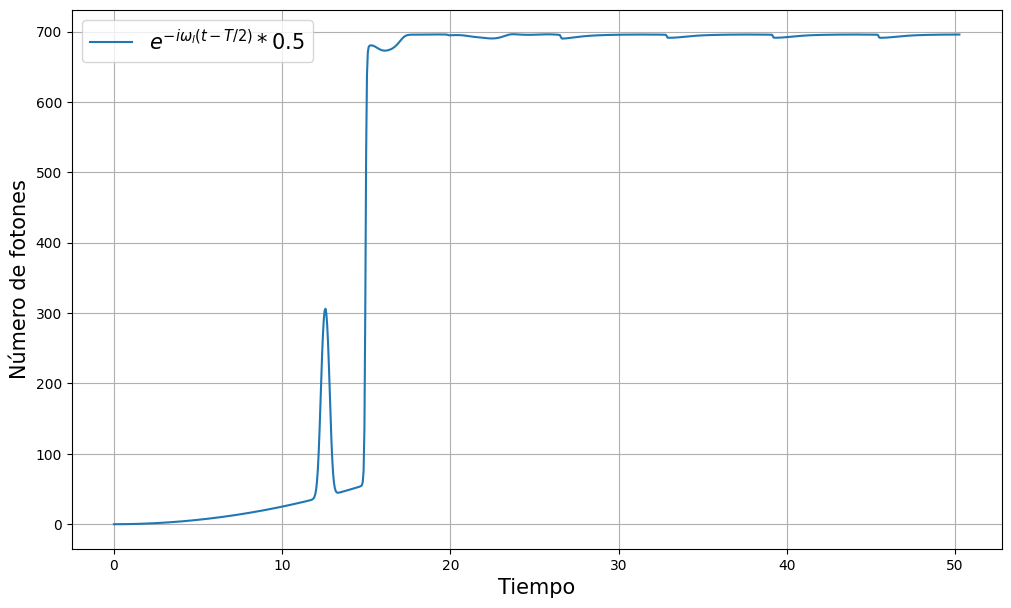

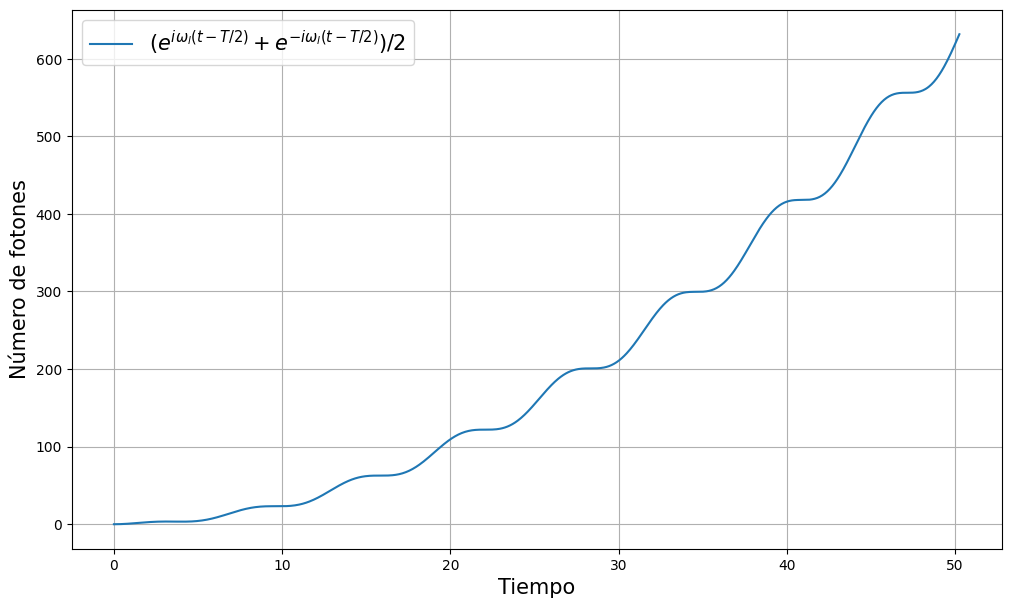

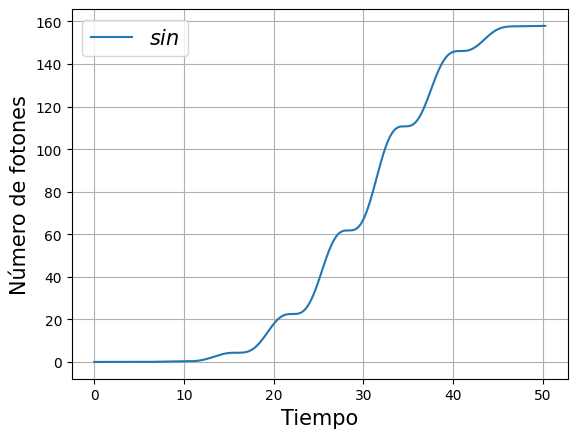

In [21]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy import *

# Definimos las constantes necesarias
hbar = 1.0
omega_l = 0.5
omega_r = 0.5
omega_0 = 0.5
mu=0.5
E0=1
T=8*np.pi*2


# Definimos el tiempo discreto
num_steps = 1000
t = np.linspace(0, T, num_steps)

# Definimos la funcion que nos da el pulso
def pulso(t, args):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso2(t): #Sin aproximación de onda rotante para dibujar
    return E0* np.cos(omega_l * (t-T/2))

#Definamos un puso de onda plana
def pulso_plano(t,args):
    return E0*np.cos(omega_l * (t-T/2))

def pulso_plano1(t,args):
    return E0*np.exp(1j*omega_l*(t-T/2))/2

#Ahora con argumento negativo
def pulso_plano2(t,args):
    return E0*np.exp(-1j*omega_l*(t-T/2))/2

def pulso_plano3(t,args):
    return E0*(np.exp(1j*omega_l*(t-T/2))+np.exp(-1j*omega_l*(t-T/2)))/2

N1 = 700
a = destroy(N1)
ad = create(N1)

# Definimos el Hamiltoniano cero atómico con sigma_z como operador de Pauli
H0 = (ad*a+0.5)*omega_0


# Definimos el operador ( sigma_+ + sigma_- )
HI = (a + ad)
HI1= a
HI2=ad

#Definamos el hamiltoniano total
HH=[H0,[HI,pulso]]
H = [H0, [HI, pulso_plano]]
H1 = [H0, [HI2, pulso_plano1], [HI1, pulso_plano2]]
H11=
H2 = [H0, [HI, pulso_plano2]]
H3 = [H0, [HI, pulso_plano3]]

# Definimos el estado inicial
psi0 = basis(N1, 0)
psi01=basis(N1,100)

# Calculamos la evolucion temporal
result0=mesolve(HH,psi0,t,[],[ad*a])
result = mesolve(H, psi0, t, [], [ad*a])
result1 = mesolve(H1, psi0, t, [], [ad*a])
result2=mesolve(H2, psi0, t, [], [ad*a])
result3=mesolve(H3, psi0, t, [], [ad*a])




# Graficamos el resultado

plt.figure(figsize=(12,7))
plt.plot(t, result.expect[0], label=r'$cos(\omega_l (t-T/2)) $')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

plt.figure(figsize=(12,7))
plt.plot(t, result1.expect[0], label=r'$e^{i\omega_l (t-T/2)} *0.5 $')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()


plt.figure(figsize=(12,7))

plt.plot(t, result2.expect[0], label=r'$e^{-i\omega_l (t-T/2)} *0.5 $')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

plt.figure(figsize=(12,7))

plt.plot(t, result3.expect[0], label=r'$(e^{i\omega_l (t-T/2)} + e^{-i\omega_l (t-T/2)})/2 $')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

plt.plot(t, result0.expect[0], label=r'$ sin $')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()




In [19]:
plt.figure(figsize=(20,10))
plt.plot(integral_values_real, integral_values_imag, '-', color='black', markersize=1.5)

array([0.00000000e+00, 2.53101196e-03, 1.01160304e-02, 2.27310575e-02,
       4.03361923e-02, 6.28757735e-02, 9.02785777e-02, 1.22458073e-01,
       1.59312726e-01, 2.00726362e-01, 2.46568575e-01, 2.96695197e-01,
       3.50948805e-01, 4.09159289e-01, 4.71144451e-01, 5.36710662e-01,
       6.05653550e-01, 6.77758736e-01, 7.52802601e-01, 8.30553089e-01,
       9.10770547e-01, 9.93208584e-01, 1.07761497e+00, 1.16373254e+00,
       1.25130014e+00, 1.34005357e+00, 1.42972658e+00, 1.52005179e+00,
       1.61076174e+00, 1.70158983e+00, 1.79227135e+00, 1.88254444e+00,
       1.97215109e+00, 2.06083810e+00, 2.14835808e+00, 2.23447035e+00,
       2.31894190e+00, 2.40154827e+00, 2.48207449e+00, 2.56031585e+00,
       2.63607881e+00, 2.70918173e+00, 2.77945567e+00, 2.84674505e+00,
       2.91090837e+00, 2.97181884e+00, 3.02936493e+00, 3.08345093e+00,
       3.13399744e+00, 3.18094177e+00, 3.22423836e+00, 3.26385907e+00,
       3.29979346e+00, 3.33204900e+00, 3.36065123e+00, 3.38564383e+00,
      

In [18]:
result0.expect[0][-1]*4

631.6286476963065

In [14]:
158*4

632